In [9]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/lib/python3.7/site-packages (20.2.3)


In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [24]:
shaw = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/AnalyzeStocks/master/data/shaw.csv")

shaw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-13,26.469999,26.799999,26.469999,26.559999,25.407160,758138
1,2019-09-16,26.530001,26.580000,26.370001,26.459999,25.311499,517451
2,2019-09-17,26.600000,26.860001,26.559999,26.719999,25.560211,614081
3,2019-09-18,26.740000,26.915001,26.660000,26.820000,25.655872,611677
4,2019-09-19,26.799999,26.900000,26.680000,26.740000,25.579346,563970
...,...,...,...,...,...,...,...
246,2020-09-04,24.549999,24.709999,24.100000,24.209999,24.209999,1522395
247,2020-09-08,24.240000,24.510000,24.010000,24.250000,24.250000,1513975
248,2020-09-09,24.370001,24.764999,24.309999,24.680000,24.680000,623691
249,2020-09-10,24.650000,24.680000,24.250000,24.330000,24.330000,834262


In [25]:
shaw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-13,26.469999,26.799999,26.469999,26.559999,25.407160,758138
1,2019-09-16,26.530001,26.580000,26.370001,26.459999,25.311499,517451
2,2019-09-17,26.600000,26.860001,26.559999,26.719999,25.560211,614081
3,2019-09-18,26.740000,26.915001,26.660000,26.820000,25.655872,611677
4,2019-09-19,26.799999,26.900000,26.680000,26.740000,25.579346,563970


In [26]:
shaw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2020-09-04,24.549999,24.709999,24.100000,24.209999,24.209999,1522395
247,2020-09-08,24.240000,24.510000,24.010000,24.250000,24.250000,1513975
248,2020-09-09,24.370001,24.764999,24.309999,24.680000,24.680000,623691
249,2020-09-10,24.650000,24.680000,24.250000,24.330000,24.330000,834262
250,2020-09-11,24.350000,24.580000,24.330000,24.459999,24.459999,907150


In [27]:
shaw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,24.626892,24.862032,24.391594,24.617968,24.050629,1.351418e+06
std,2.030536,1.918833,2.135350,2.024455,1.800444,1.184750e+06
min,18.350000,19.209999,17.770000,17.840000,17.465076,1.624250e+05
25%,23.010000,23.235000,22.655000,22.955000,22.616110,7.650290e+05
50%,24.870001,25.100000,24.680000,24.840000,24.696880,1.053589e+06
75%,26.360001,26.490000,26.240000,26.350000,25.466082,1.523210e+06
max,27.559999,27.690001,27.469999,27.629999,26.530903,1.390507e+07


In [28]:
shaw.info

<bound method DataFrame.info of            Date       Open       High        Low      Close  Adj Close  \
0    2019-09-13  26.469999  26.799999  26.469999  26.559999  25.407160   
1    2019-09-16  26.530001  26.580000  26.370001  26.459999  25.311499   
2    2019-09-17  26.600000  26.860001  26.559999  26.719999  25.560211   
3    2019-09-18  26.740000  26.915001  26.660000  26.820000  25.655872   
4    2019-09-19  26.799999  26.900000  26.680000  26.740000  25.579346   
..          ...        ...        ...        ...        ...        ...   
246  2020-09-04  24.549999  24.709999  24.100000  24.209999  24.209999   
247  2020-09-08  24.240000  24.510000  24.010000  24.250000  24.250000   
248  2020-09-09  24.370001  24.764999  24.309999  24.680000  24.680000   
249  2020-09-10  24.650000  24.680000  24.250000  24.330000  24.330000   
250  2020-09-11  24.350000  24.580000  24.330000  24.459999  24.459999   

      Volume  
0     758138  
1     517451  
2     614081  
3     611677  
4   

In [30]:
shaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [31]:
conn = sqlite3.connect("shaw.db")
c = conn.cursor()

In [32]:
conn = sqlite3.connect("shaw.db")
c = conn.cursor()

In [33]:
shaw.to_sql("shaw", conn, if_exists='replace')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:2612: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [34]:
#See data
c.execute("""SELECT * FROM shaw""")
rows = c.fetchall()
rows

[(0,
  '2019-09-13',
  26.469998999999998,
  26.799999,
  26.469998999999998,
  26.559998999999998,
  25.40716,
  758138),
 (1,
  '2019-09-16',
  26.530001000000002,
  26.58,
  26.370001000000002,
  26.459999,
  25.311498999999998,
  517451),
 (2,
  '2019-09-17',
  26.6,
  26.860001,
  26.559998999999998,
  26.719998999999998,
  25.560211,
  614081),
 (3, '2019-09-18', 26.74, 26.915001, 26.66, 26.82, 25.655872, 611677),
 (4, '2019-09-19', 26.799999, 26.9, 26.68, 26.74, 25.579345999999997, 563970),
 (5,
  '2019-09-20',
  26.73,
  26.82,
  26.469998999999998,
  26.719998999999998,
  25.560211,
  2192143),
 (6, '2019-09-23', 26.58, 26.68, 26.4, 26.5, 25.34976, 479738),
 (7,
  '2019-09-24',
  26.5,
  26.799999,
  26.440001000000002,
  26.67,
  25.512383,
  773797),
 (8, '2019-09-25', 26.67, 26.75, 26.325001, 26.34, 25.196709, 582209),
 (9, '2019-09-26', 26.32, 26.41, 26.25, 26.35, 25.206278, 667825),
 (10,
  '2019-09-27',
  26.309998999999998,
  26.360001,
  25.889999,
  25.98,
  24.852331

In [35]:
shaw.to_excel("shaw.xls")

pd.read_excel("shaw.xls")

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-09-13,26.469999,26.799999,26.469999,26.559999,25.407160,758138
1,1,2019-09-16,26.530001,26.580000,26.370001,26.459999,25.311499,517451
2,2,2019-09-17,26.600000,26.860001,26.559999,26.719999,25.560211,614081
3,3,2019-09-18,26.740000,26.915001,26.660000,26.820000,25.655872,611677
4,4,2019-09-19,26.799999,26.900000,26.680000,26.740000,25.579346,563970
...,...,...,...,...,...,...,...,...
246,246,2020-09-04,24.549999,24.709999,24.100000,24.209999,24.209999,1522395
247,247,2020-09-08,24.240000,24.510000,24.010000,24.250000,24.250000,1513975
248,248,2020-09-09,24.370001,24.764999,24.309999,24.680000,24.680000,623691
249,249,2020-09-10,24.650000,24.680000,24.250000,24.330000,24.330000,834262


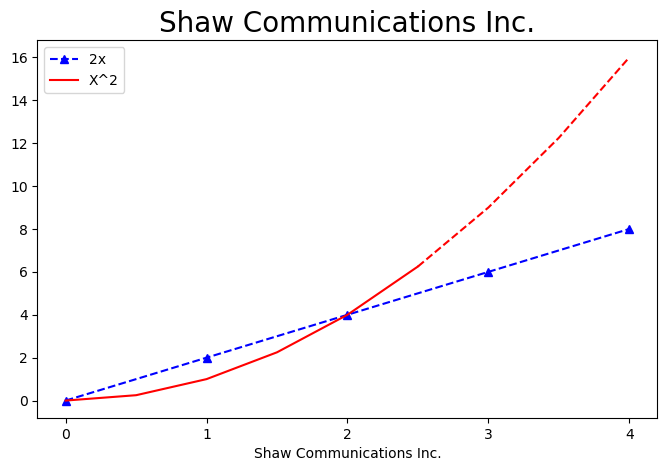

In [36]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Shaw Communications Inc.', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Shaw Communications Inc.')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()